## Monitoring total grocery bill

My receipts can be found at the following address: https://www.migros.ch/de/cumulus/konto.html

In [1]:
#import the necessary Python libraries
import pandas as pd
import numpy as np
from datetime import datetime, date, time, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import glob 

In [2]:
#use glob function to import and concatenate the bills
#import glob

#files = glob.glob("file*.csv")

#df_list = []
#for filename in files:
#  data = pd.read_csv(filename)
#  df_list.append(data)

#df = pd.concat(df_list)

#print(files)

In [ ]:
#It might be best to do a percent change graph as that may tell more than the bill amounts. 

In [ ]:
#import the files without an index column and change any empty fields to NA
bills = pd.read_csv('bills.csv', index_col=None, na_values=['NA'])

In [3]:
#I will need a line to append new files as they come in.

In [4]:
bills.head()

,Datum,Zeit,Filiale,Kassennummer,Transaktionsnummer,Artikel,Menge,Aktion,Umsatz
0,06.03.2020,15:57:29,MM Metalli Zug,436,114,MBud Orangensaft,1.0,0.0,1.95
1,06.03.2020,15:57:29,MM Metalli Zug,436,114,M&M's Peanuts 1kg,1.0,0.0,9.25
2,06.03.2020,15:57:29,MM Metalli Zug,436,114,Butterzopf 300g,1.0,0.0,2.40
3,06.03.2020,15:57:29,MM Metalli Zug,436,114,Baslerbrot 500g,1.0,0.0,2.65
4,06.03.2020,15:57:29,MM Metalli Zug,436,114,Beeren gemischt,2.0,-5.9,13.60


In [5]:
#convert the Date to a datetime format
bills['Datum'] = pd.to_datetime(bills['Datum'], format='%d.%m.%Y')

In [6]:
bills.dtypes

Datum                 datetime64[ns]
Zeit                          object
Filiale                       object
Kassennummer                   int64
Transaktionsnummer             int64
Artikel                       object
Menge                        float64
Aktion                       float64
Umsatz                       float64
dtype: object

In [7]:
bills.shape

(4958, 9)

In [8]:
Daily_totals = bills.groupby(bills.Datum).sum().reset_index()
Daily_totals.head()

,Datum,Kassennummer,Transaktionsnummer,Menge,Aktion,Umsatz
0,2018-04-04,7395,63835,15.143,0.95,58.60
1,2018-04-09,6960,62208,14.698,4.10,63.70
2,2018-04-10,4774,88363,8.300,0.00,37.05
3,2018-04-12,5220,47424,10.724,0.00,30.60
4,2018-04-13,1815,39093,6.000,0.00,16.80


In [9]:
#remove unnecessary columns from the dataframe
Daily_totals.drop(['Kassennummer', 'Transaktionsnummer', 'Menge'], axis=1, inplace=True)
Daily_totals.head()


,Datum,Aktion,Umsatz
0,2018-04-04,0.95,58.60
1,2018-04-09,4.10,63.70
2,2018-04-10,0.00,37.05
3,2018-04-12,0.00,30.60
4,2018-04-13,0.00,16.80


<Figure size 1296x720 with 0 Axes>

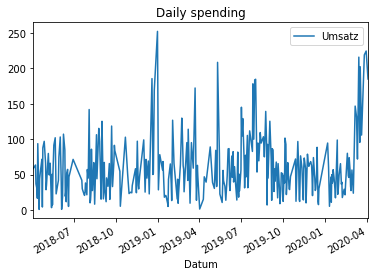

In [24]:
plt.figure(figsize=(18, 10))
Daily_totals.plot(x='Datum', y='Umsatz', title='Daily spending')
plt.savefig('Daily Spending')

#it is interesting to note the huge spike in spending during Christmas holidays and the Covid lock-down.

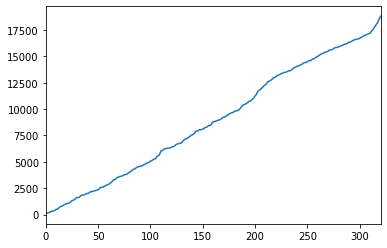

In [15]:
Daily_totals['Umsatz'].cumsum().plot()

In [ ]:
Daily_totals['avg'] = Daily_totals['Umsatz'].rolling(window=200).mean()


In [11]:
totals_array = Daily_totals['Umsatz']
average_spend = np.mean(totals_array)
median_spend = np.median(totals_array)

In [12]:
mode_spend = stats.mode(totals_array)
print("The mode age and its frequency of bills is: " + str(mode_spend[0][0]) + " and " + str(mode_spend[1][0]))

The mode age and its frequency of bills is: 5.2 and 2


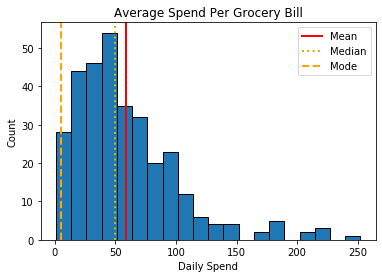

In [13]:
plt.hist(Daily_totals.Umsatz, bins=20, edgecolor='black') #range=(10, 80), 
plt.title("Average Spend Per Grocery Bill")
plt.xlabel("Daily Spend")
plt.ylabel("Count")
plt.axvline(average_spend, color='r', linestyle='solid', linewidth=2, label="Mean")
plt.axvline(median_spend, color='y', linestyle='dotted', linewidth=2, label="Median")
plt.axvline(5.2, color='orange', linestyle='dashed', linewidth=2, label="Mode")
plt.legend()

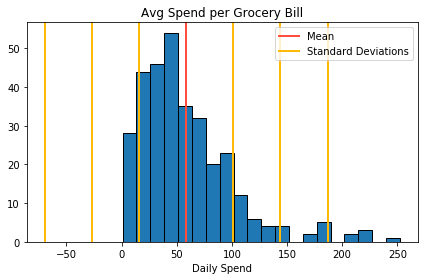

In [22]:
migros_standard_deviation = np.std(Daily_totals.Umsatz)

plt.title("Avg Spend per Grocery Bill")
plt.xlabel("Daily Spend")

plt.hist(Daily_totals.Umsatz, bins=20, edgecolor='black')

plt.axvline(average_spend, color='#FD4E40', linestyle='solid', linewidth=2, label = "Mean")

plt.axvline(average_spend + migros_standard_deviation, color='#FFB908', linestyle='solid', linewidth=2, label = "Standard Deviations")
plt.axvline(average_spend - migros_standard_deviation, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(average_spend + migros_standard_deviation * 2, color='#FFB908', linestyle='solid', linewidth=2)
plt.axvline(average_spend - migros_standard_deviation * 2, color='#FFB908', linestyle='solid', linewidth=2)

plt.axvline(average_spend + migros_standard_deviation * 3, color='#FFB908', linestyle='solid', linewidth=2)
plt.axvline(average_spend - migros_standard_deviation * 3, color='#FFB908', linestyle='solid', linewidth=2)

#plt.xlim(55, 90)
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
Daily_totals['day_of_week'] = Daily_totals['Datum'].dt.weekday_name
Daily_totals['day_of_week'] = Daily_totals['Datum'].dt.weekday_name
Daily_totals.head()

,Datum,Aktion,Umsatz,day_of_week
0,2018-04-04,0.95,58.60,Wednesday
1,2018-04-09,4.10,63.70,Monday
2,2018-04-10,0.00,37.05,Tuesday
3,2018-04-12,0.00,30.60,Thursday
4,2018-04-13,0.00,16.80,Friday


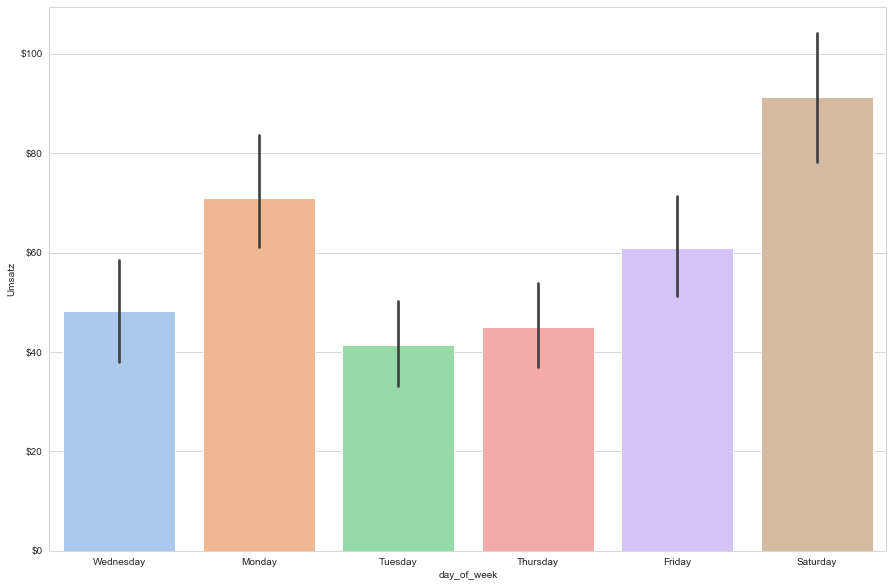

In [28]:
# Set color palette
sns.set_palette("pastel")

# Set style
sns.set_style("whitegrid")

import matplotlib.ticker as mtick
f, ax = plt.subplots(figsize=(15, 10))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

sns.barplot(data=Daily_totals, x="day_of_week", y="Umsatz")
plt.show()

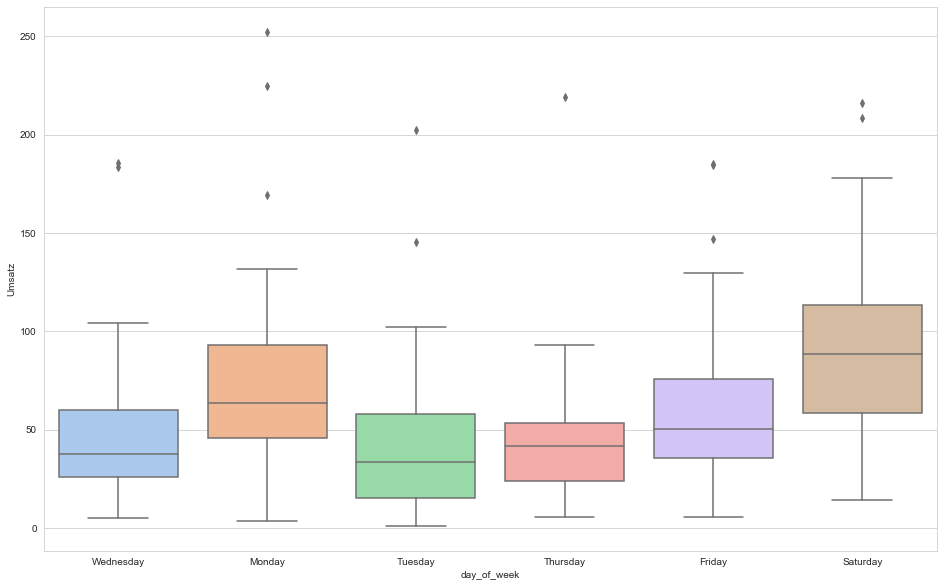

In [29]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=Daily_totals, x="day_of_week", y="Umsatz")
plt.show()

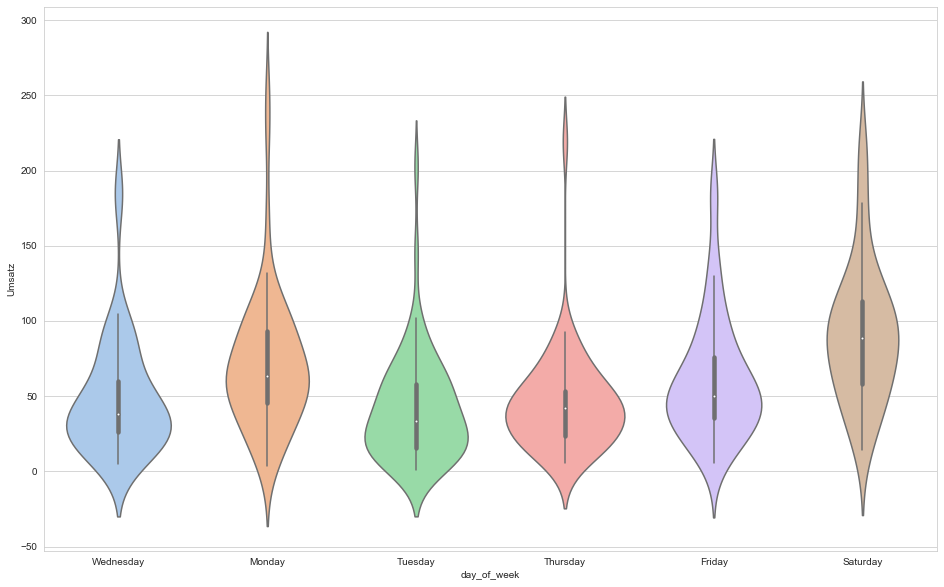

In [31]:
plt.figure(figsize=(16, 10))

sns.violinplot(data=Daily_totals, x="day_of_week", y = "Umsatz")
plt.show()

In [ ]:
#Some ideas for the future
#running total and average
#look at the distribution for each month
#look at the distribution for time of day (opening hours only)
#add a trend line to see how it's moving
#see how much I've saved in Cumulus Bonus
#see how much I've saved in Sales/Aktion
#see how to automatically pull and append the new bills
#Total spending over time and trend
#look at categorizing the transactions to see spending by category
#where is the spending happening? 
#I wonder if there is any online information (maybe in a shareholder report?) showing avg. spending per customer.
#possible to compare to a cost of living chart? 
